# **EV Statistics: State-wise Vehicle and Charging Station Data**

# **1. Importing Libraries:**

In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization
import numpy as np  # For numerical operations

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.cluster import KMeans  # For KMeans clustering algorithm

import warnings  # For suppressing warnings
warnings.filterwarnings("ignore")  # Ignore any warnings

# **2. Data Ingestion:** 

In [5]:
# Load EV Charger Dataset from CSV file
df1 = pd.read_csv("D:\\Project-2.2\\Datasets\\1.EV-Charger-Dataset.csv")

# Display the first few rows of the dataset
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


# **3. Exploratory Data Analysis (EDA):**

In [7]:
# Summary statistics
display(df1.describe())

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


| Inference                                                                                                                                          |
|----------------------------------------------------------------------------------------------------------------------------------------------------|
| 1. The average number of 2W vehicles is higher compared to 4W vehicles and buses across regions.                                                 |
| 2. There is a considerable difference between the maximum and minimum values for each vehicle type, indicating disparities in vehicle distribution across regions. |
| 3. The average number of charging stations is relatively low compared to the number of vehicles, suggesting a potential need for more charging infrastructure to support the growing number of electric vehicles. |


In [10]:
# Drop the 'Region' column before computing the correlation matrix
numeric_df = df1.drop(columns=['Region'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
display(corr_matrix)

,2W,3W,4W,Bus,Chargers
2W,1.000000,-0.048201,0.724890,0.497770,0.756909
3W,-0.048201,1.000000,0.048927,0.569081,0.135569
4W,0.724890,0.048927,1.000000,0.791674,0.520870
Bus,0.497770,0.569081,0.791674,1.000000,0.396829
Chargers,0.756909,0.135569,0.520870,0.396829,1.000000


| Inference                                                                                              |
|--------------------------------------------------------------------------------------------------------|
| 1. Strong positive correlation between the number of 2W vehicles and the number of charging stations. |
| 2. Moderate positive correlations between 2W vehicles and 4W vehicles, and between 2W vehicles and buses. |
| 3. Moderate positive correlation between 3W vehicles and buses.                                        |
| 4. Weak correlations between 3W vehicles and charging stations, and between 4W vehicles and 3W vehicles. |


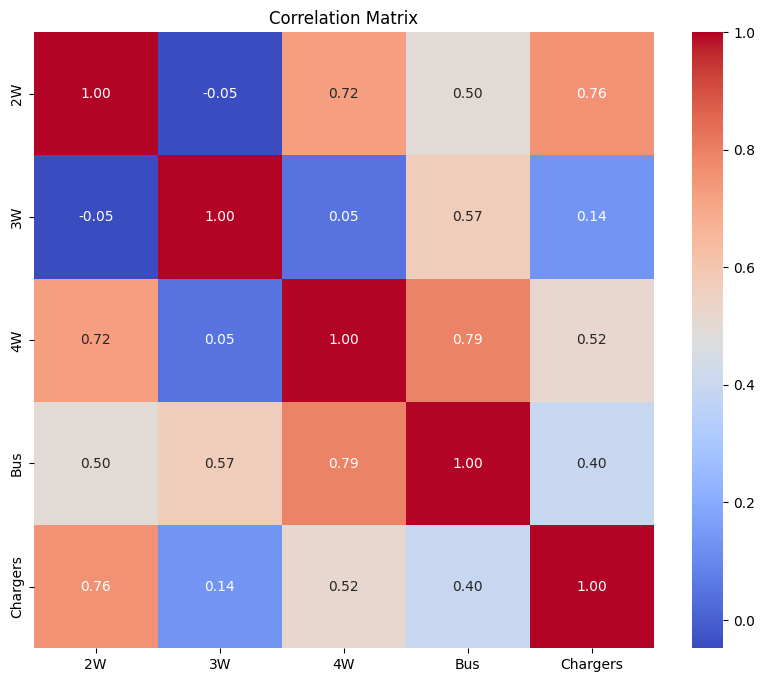

In [12]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")

# Save the figure
plt.savefig("1.Correlation_Heatmap.png")

# Show the plot
plt.show()

#### **Two Wheelers EVs:**

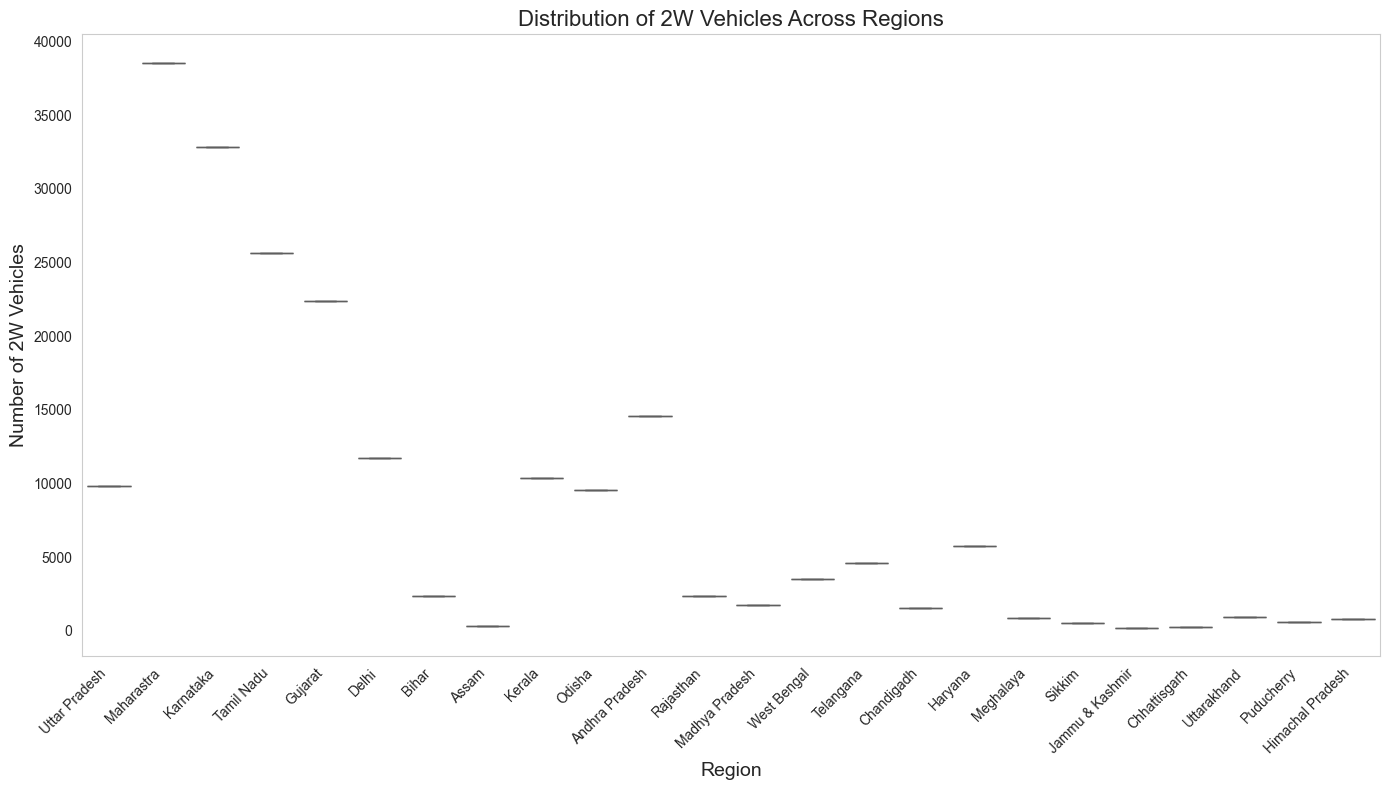

In [18]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a boxplot of 2W vehicles across regions
plt.figure(figsize=(14, 8))
sns.boxplot(x="Region", y="2W", data=df1, palette="Set3")

# Add a title and labels
plt.title("Distribution of 2W Vehicles Across Regions", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Number of 2W Vehicles", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add horizontal grid lines
plt.grid(axis="y")

# Save the figure
plt.tight_layout()
plt.savefig("2.Distribution_2w_vehicles.png")

# Show the plot
plt.show()

#### **Three Wheeler EVs:**

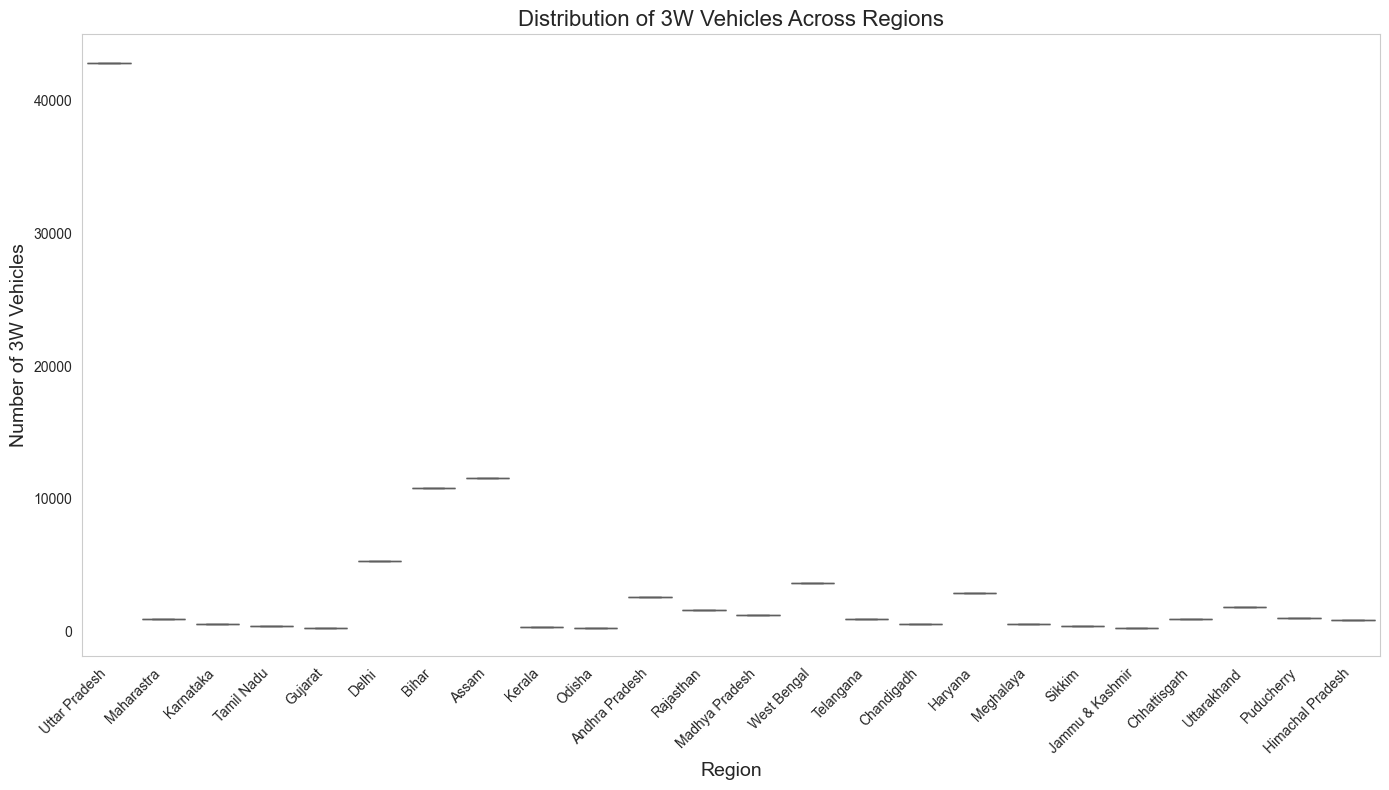

In [19]:
# Create a boxplot of 3W vehicles across regions
plt.figure(figsize=(14, 8))
sns.boxplot(x="Region", y="3W", data=df1, palette="Set3")

# Add a title and labels
plt.title("Distribution of 3W Vehicles Across Regions", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Number of 3W Vehicles", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add horizontal grid lines
plt.grid(axis="y")

# Save the figure
plt.tight_layout()
plt.savefig("3.Distribution_3w_vehicles.png")

# Show the plot
plt.show()

#### **Four Wheeler EVs:**

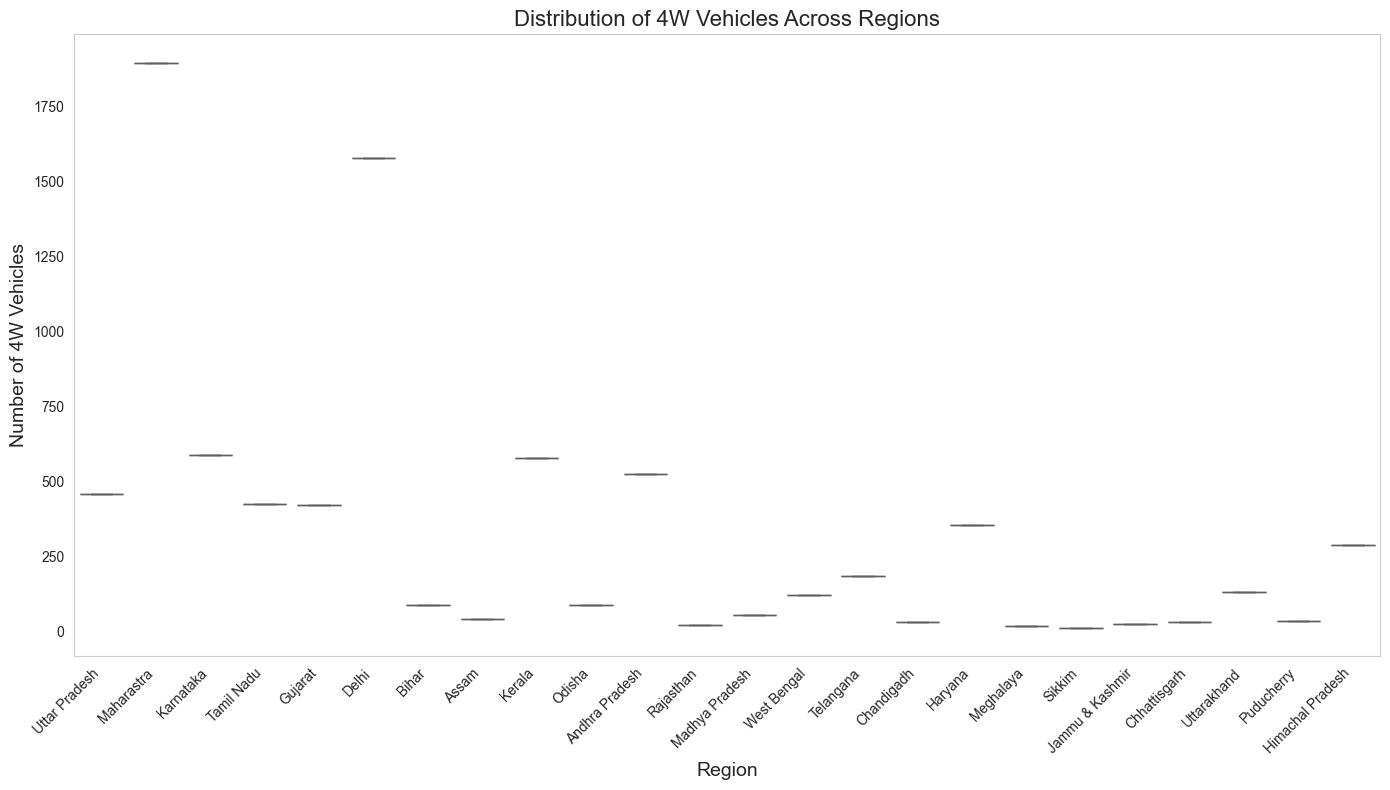

In [20]:
# Create a boxplot of 3W vehicles across regions
plt.figure(figsize=(14, 8))
sns.boxplot(x="Region", y="4W", data=df1, palette="Set3")

# Add a title and labels
plt.title("Distribution of 4W Vehicles Across Regions", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Number of 4W Vehicles", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add horizontal grid lines
plt.grid(axis="y")

# Save the figure
plt.tight_layout()
plt.savefig("4.Distribution_4w_vehicles.png")

# Show the plot
plt.show()

#### **EV Buses:**

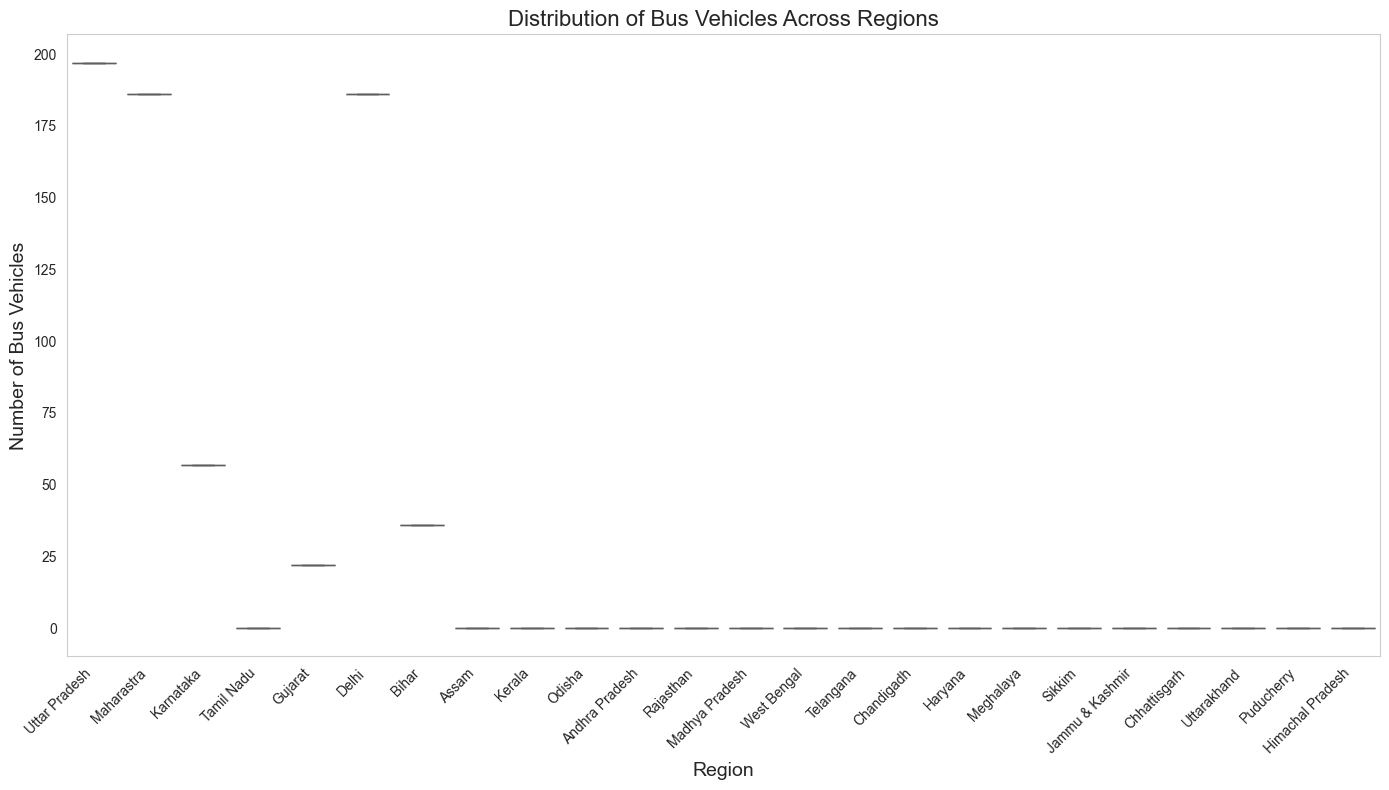

In [22]:
# Create a boxplot of 3W vehicles across regions
plt.figure(figsize=(14, 8))
sns.boxplot(x="Region", y="Bus", data=df1, palette="Set3")

# Add a title and labels
plt.title("Distribution of Bus Vehicles Across Regions", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Number of Bus Vehicles", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add horizontal grid lines
plt.grid(axis="y")

# Save the figure
plt.tight_layout()
plt.savefig("5.Distribution_Bus_vehicles.png")

# Show the plot
plt.show()

<Figure size 1200x1000 with 0 Axes>

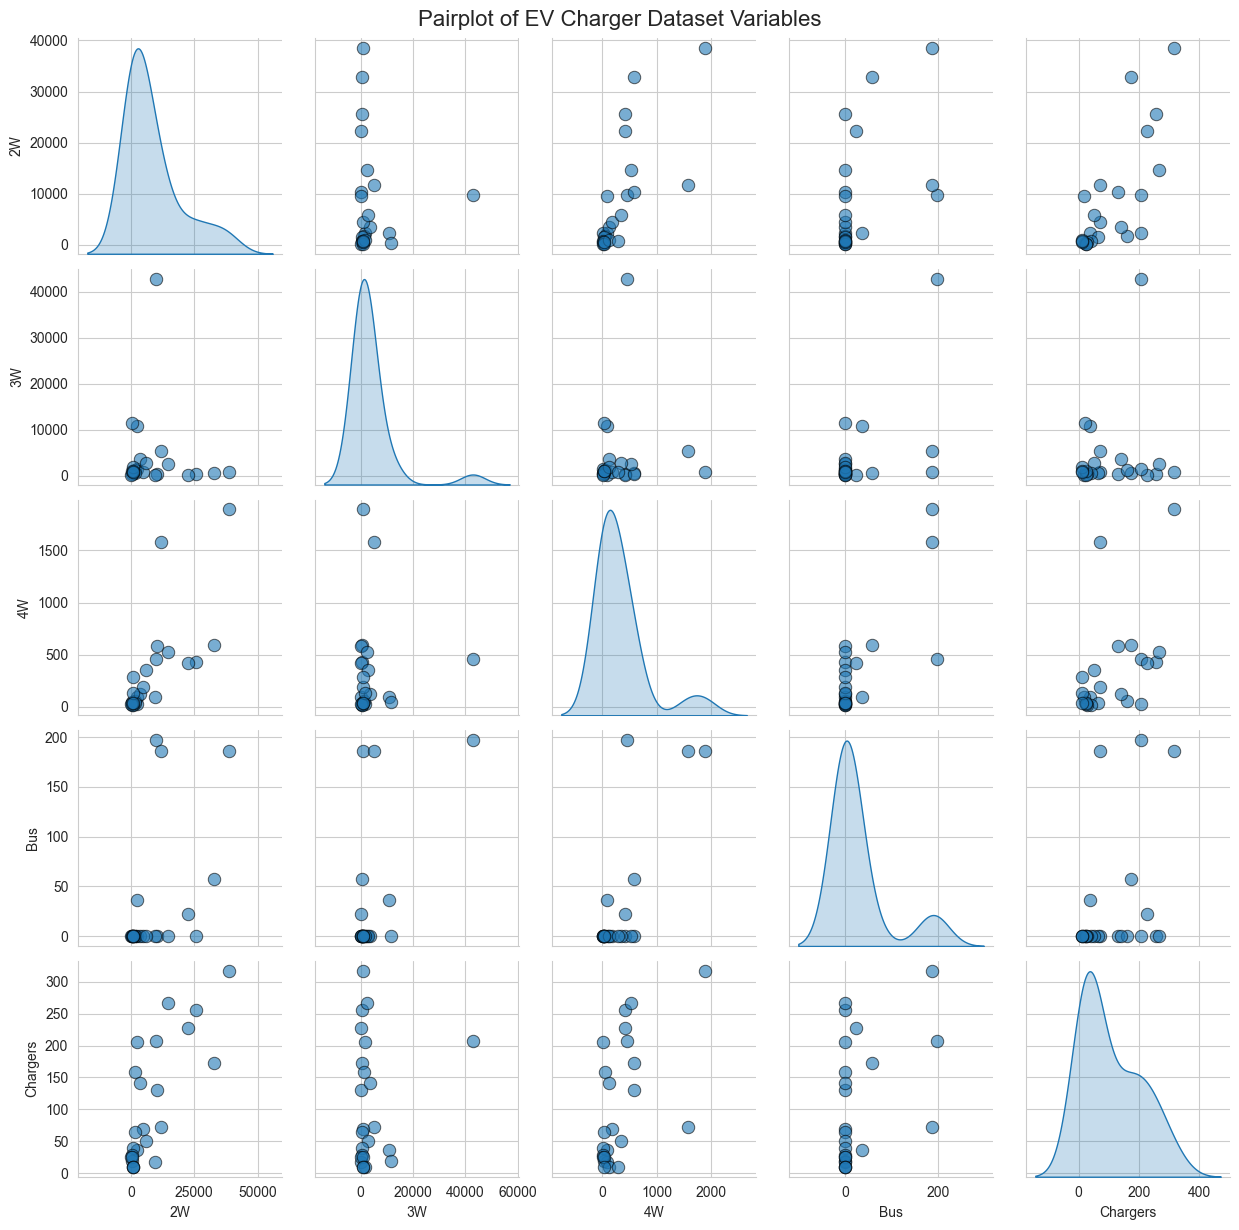

In [23]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a pairplot of all variables
plt.figure(figsize=(12, 10))
sns.pairplot(df1, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

# Add a title
plt.suptitle("Pairplot of EV Charger Dataset Variables", fontsize=16)

# Save the figure
plt.savefig("6.pairplot_ev_charger_dataset.png")

# Show the plot
plt.tight_layout()
plt.show()

### **Exploring Two-Wheeler Electric Vehicles: A Comprehensive Analysis:**

In [25]:
df1.sort_values(by='2W', ascending=False)

,Region,2W,3W,4W,Bus,Chargers
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228
10,Andhra Pradesh,14578,2587,524,0,266
5,Delhi,11756,5287,1578,186,72
8,Kerala,10345,308,578,0,131
0,Uttar Pradesh,9852,42881,458,197,207
9,Odisha,9540,253,89,0,18
16,Haryana,5782,2876,354,0,50


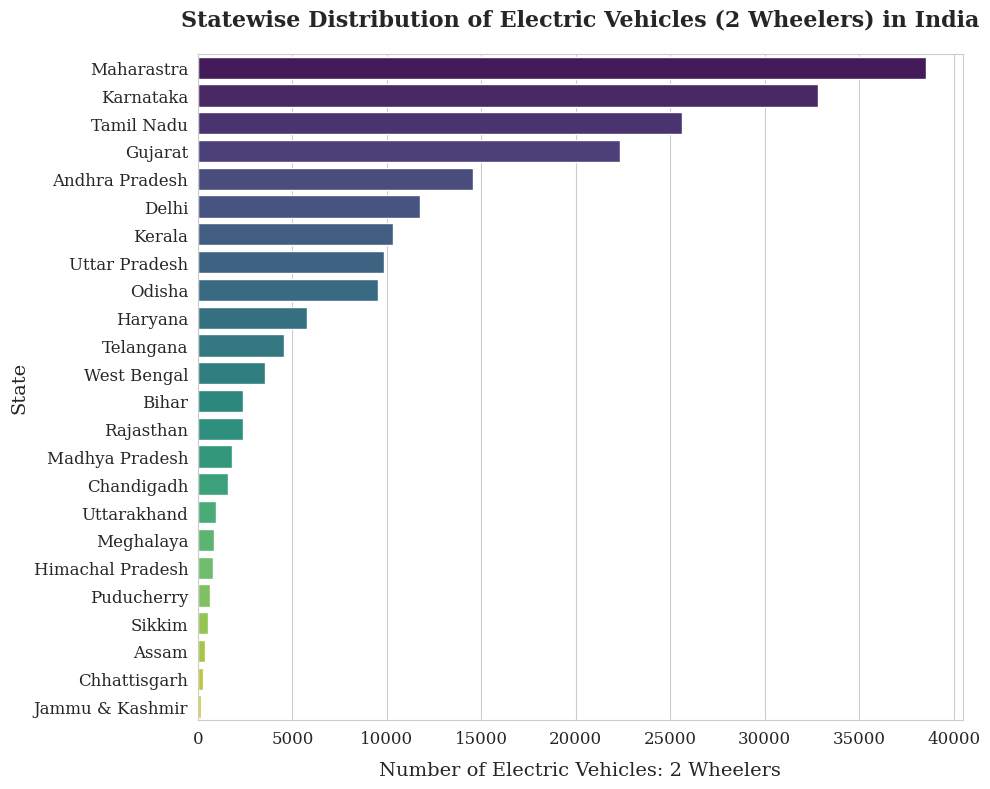

In [24]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the bar plot for 2 wheelers
plt.figure(figsize=(10, 8))
sns.barplot(data=df1.sort_values(by='2W', ascending=False), x='2W', y='Region', palette='viridis')

# Add labels and title
plt.xlabel('Number of Electric Vehicles: 2 Wheelers', fontsize=14, family='serif', labelpad=10)
plt.ylabel('State', fontsize=14, family='serif')
plt.title('Statewise Distribution of Electric Vehicles (2 Wheelers) in India', fontsize=16, weight='bold', family='serif', pad=20)

# Customize ticks and font family
plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')

# Save the figure
plt.savefig("2w_ev_distribution.png", bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

| Inference                                                                             |
|---------------------------------------------------------------------------------------|
| 1. Uttar Pradesh has the highest number of 2W electric vehicles with 42881 units.     |
| 2. Maharashtra follows Uttar Pradesh with 38558 units of 2W electric vehicles.        |
| 3. Delhi, Karnataka, and Tamil Nadu also have a significant number of 2W electric vehicles, with over 10000 units each. |
| 4. The states with the lowest number of 2W electric vehicles include Jammu & Kashmir, Chhattisgarh, and Assam, with less than 400 units each. |
| 5. The distribution of 2W electric vehicles varies widely across different regions of India. |


### **Exploring Three-Wheeler Electric Vehicles: A Comprehensive Analysis:**

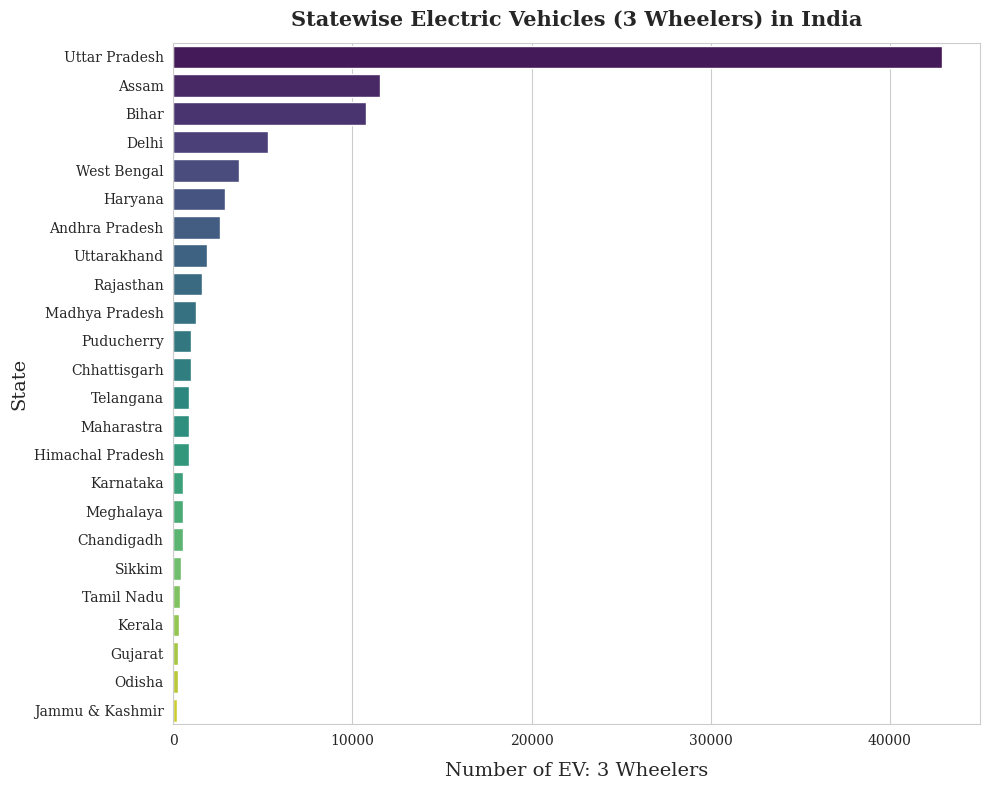

In [30]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Plotting the bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=df1.sort_values(by='3W', ascending=False), x='3W', y='Region', palette='viridis')
plt.xlabel('Number of EV: 3 Wheelers', fontsize=14, family='serif', labelpad=10)
plt.ylabel('State', fontsize=14, family='serif')
plt.title('Statewise Electric Vehicles (3 Wheelers) in India', fontsize=15, family='serif', weight='bold', pad=12)
plt.xticks(fontfamily='serif')
plt.yticks(fontfamily='serif')
plt.tight_layout()

# Save the figure
plt.savefig('3_wheelers_visualization.png', dpi=300)

# Show the plot
plt.show()

### **Exploring Four-Wheeler Electric Vehicles: A Comprehensive Analysis:**

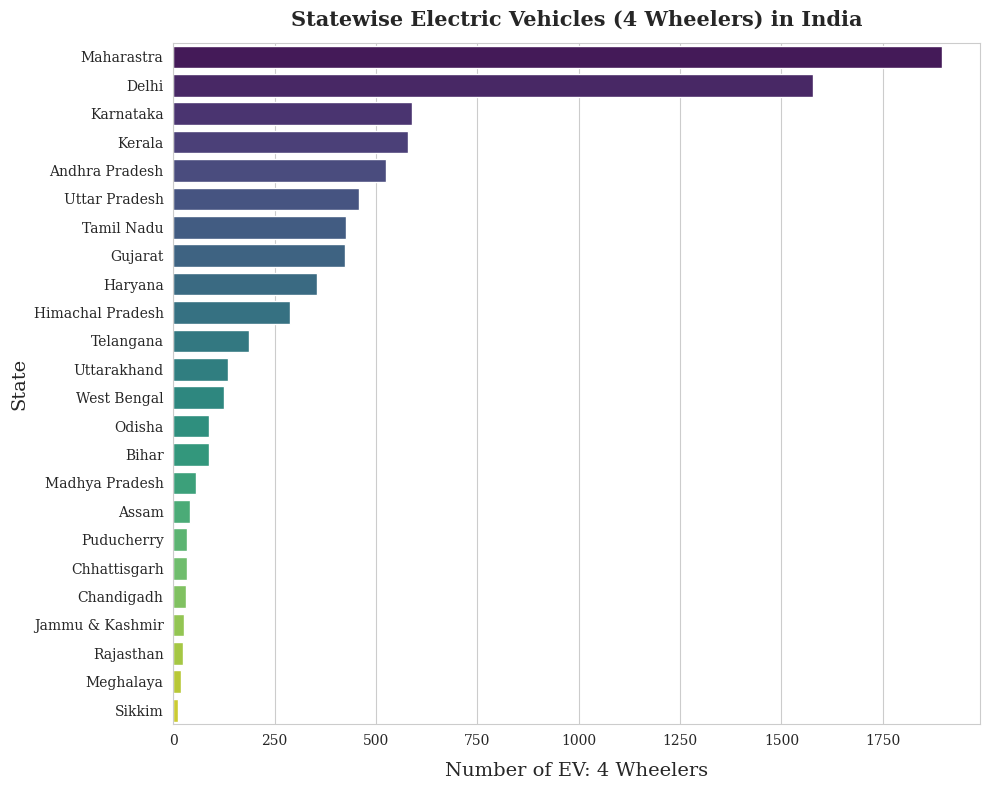

In [32]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Plotting the bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=df1.sort_values(by='4W', ascending=False), x='4W', y='Region', palette='viridis')
plt.xlabel('Number of EV: 4 Wheelers', fontsize=14, family='serif', labelpad=10)
plt.ylabel('State', fontsize=14, family='serif')
plt.title('Statewise Electric Vehicles (4 Wheelers) in India', fontsize=15, family='serif', weight='bold', pad=12)
plt.xticks(fontfamily='serif')
plt.yticks(fontfamily='serif')
plt.tight_layout()

# Save the figure
plt.savefig('4_wheelers_visualization.png', dpi=300)

# Show the plot
plt.show()

### **Visualization of Charging Stations Sanctioned Across Indian States:**

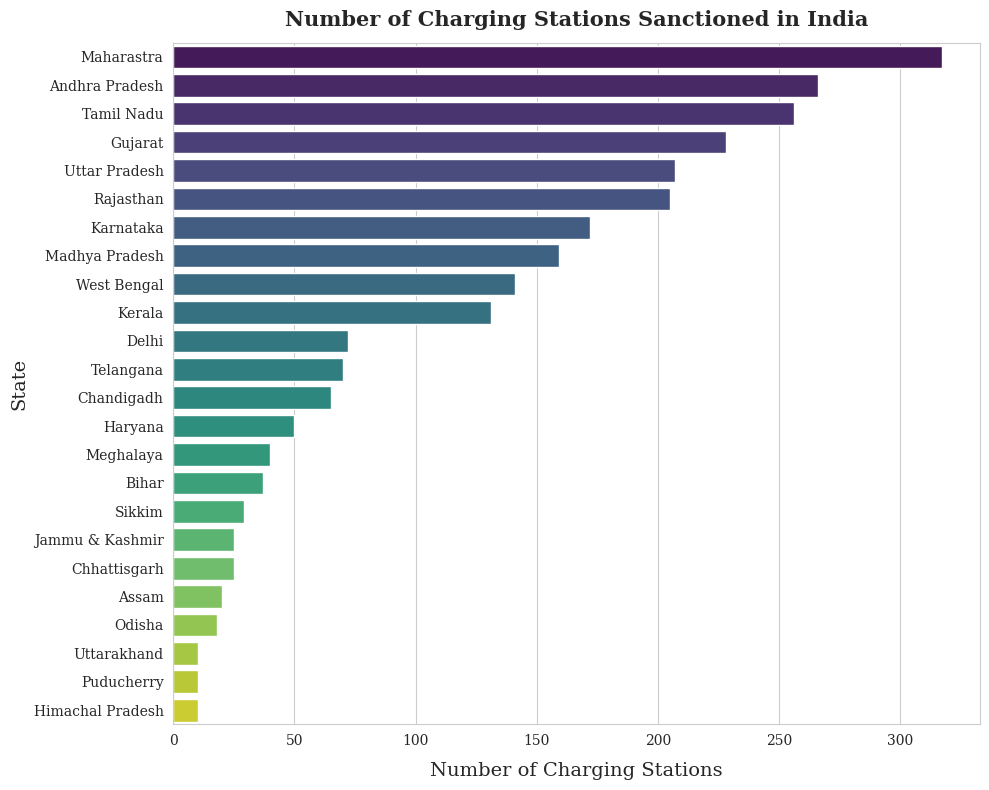

In [33]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Plotting the bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=df1.sort_values(by='Chargers', ascending=False), x='Chargers', y='Region', palette='viridis')
plt.xlabel('Number of Charging Stations', fontsize=14, family='serif', labelpad=10)
plt.ylabel('State', fontsize=14, family='serif')
plt.title('Number of Charging Stations Sanctioned in India', fontsize=15, family='serif', weight='bold', pad=12)
plt.xticks(fontfamily='serif')
plt.yticks(fontfamily='serif')
plt.tight_layout()

# Save the figure
plt.savefig('charging_stations_sanctioned_visualization.png', dpi=300)

# Show the plot
plt.show()